<a href="https://colab.research.google.com/github/chandhinipj/Medical-insurance-cost-prediction-Machine-Learning/blob/main/HealthInsuranceCost_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###Importing the Dependencies/Libraries

In [ ]:
# using panda library to store dataset
import pandas as pd

##Data Collection and Analysis

In [ ]:
# loading the medical insurance dataset from csv file to a Pandas DataFrame
insurance_dataset = pd.read_csv('/content/insurance.csv')


In [ ]:
# displaying dataset
insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0.0,yes,southwest,16884.92400
1,18,male,33.770,1.0,no,southeast,1725.55230
2,28,male,33.000,3.0,no,southeast,4449.46200
3,33,male,22.705,0.0,no,northwest,21984.47061
4,32,male,28.880,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1334,18,female,31.920,0.0,no,northeast,2205.98080
1335,18,female,36.850,0.0,no,southeast,1629.83350
1336,21,female,25.800,0.0,no,southwest,2007.94500
1337,61,female,29.070,0.0,yes,northwest,29141.36030


In [ ]:
# displaying first 5 rows of the dataset
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0.0,yes,southwest,16884.92400
1,18,male,33.770,1.0,no,southeast,1725.55230
2,28,male,33.000,3.0,no,southeast,4449.46200
3,33,male,22.705,0.0,no,northwest,21984.47061
4,32,male,28.880,0.0,no,northwest,3866.85520


In [ ]:
# displaying last 5 rows of the dataset
insurance_dataset.tail()

,age,sex,bmi,children,smoker,region,charges
1334,18,female,31.92,0.0,no,northeast,2205.9808
1335,18,female,36.85,0.0,no,southeast,1629.8335
1336,21,female,25.80,0.0,no,southwest,2007.9450
1337,61,female,29.07,0.0,yes,northwest,29141.3603
1338,20,NaN,39.00,NaN,NaN,NaN,0.0000


In [ ]:
# Displaying  statistics about the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1339.000000,1339.000000,1338.000000,1338.000000
mean,39.192681,30.669623,1.094918,13270.422265
std,14.054514,6.100163,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,26.500000,26.302500,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.700000,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# displaying total number of rows and columns of the dataset
insurance_dataset.shape

(1339, 7)

###Data Cleaning

In [ ]:
# getting some informations about the dataset
# Like Total Number Rows, Total Number of Columns,
# Datatypes of Each Column And Memory Requirement
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1339 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1339 non-null   float64
 3   children  1338 non-null   float64
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.4+ KB


In [ ]:
# check for duplicate rows
duplicate = insurance_dataset.duplicated()

duplicate
# count duplicate rows
duplicate_rows_count = duplicate.sum()

print(duplicate_rows_count)


1


In [ ]:
# display duplicate rows
duplicate_rows = insurance_dataset[duplicate]

print(duplicate_rows)

     age   sex    bmi  children smoker     region    charges
581   19  male  30.59       0.0     no  northwest  1639.5631


In [ ]:
# remove duplicate rows
insurance_dataset = insurance_dataset.drop_duplicates()
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1338 entries, 0 to 1338
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1337 non-null   float64
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 83.6+ KB


In [ ]:
# display the number of remaining rows
print(len(insurance_dataset))

1338


In [ ]:
# checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         1
bmi         0
children    1
smoker      1
region      1
charges     1
dtype: int64

In [ ]:
#removing null values

# Looking at the sex column
insurance_dataset['sex'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1334    False
1335    False
1336    False
1337    False
1338     True
Name: sex, Length: 1338, dtype: bool

In [ ]:
# Drop row that has all NaN values
insurance_dataset.dropna(inplace=True) #dropna() method used to drop rows
# with NaN (Not a Number) and None values from pandas DataFrame
# and (inplace=True) which is used to remove NAN values from the existing DataFrame.
insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0.0,yes,southwest,16884.92400
1,18,male,33.770,1.0,no,southeast,1725.55230
2,28,male,33.000,3.0,no,southeast,4449.46200
3,33,male,22.705,0.0,no,northwest,21984.47061
4,32,male,28.880,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3.0,no,northwest,10600.54830
1334,18,female,31.920,0.0,no,northeast,2205.98080
1335,18,female,36.850,0.0,no,southeast,1629.83350
1336,21,female,25.800,0.0,no,southwest,2007.94500


In [ ]:
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   float64
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 83.6+ KB


Displaying total  Number of Rows And total Number of Columns in the medical insurance dataset after cleaning dataset

In [ ]:
insurance_dataset.isnull().sum() #checking null values again

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
insurance_dataset.isnull().sum() #checking null values againinsurance_dataset.shape

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
print("Number of Rows",insurance_dataset.shape[0])
print("Number of Columns",insurance_dataset.shape[1])

Number of Rows 1337
Number of Columns 7


In [ ]:
# Displaying  statistics about the dataset
insurance_dataset.describe

<bound method NDFrame.describe of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900       0.0    yes  southwest  16884.92400
1      18    male  33.770       1.0     no  southeast   1725.55230
2      28    male  33.000       3.0     no  southeast   4449.46200
3      33    male  22.705       0.0     no  northwest  21984.47061
4      32    male  28.880       0.0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970       3.0     no  northwest  10600.54830
1334   18  female  31.920       0.0     no  northeast   2205.98080
1335   18  female  36.850       0.0     no  southeast   1629.83350
1336   21  female  25.800       0.0     no  southwest   2007.94500
1337   61  female  29.070       0.0    yes  northwest  29141.36030

[1337 rows x 7 columns]>

In [ ]:
# Displaying overall statistics about the dataset
insurance_dataset.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1337.000000,1337,1337.000000,1337.000000,1337,1337,1337.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,675,NaN,NaN,1063,364,NaN
mean,39.222139,NaN,30.663452,1.095737,NaN,NaN,13279.121487
std,14.044333,NaN,6.100468,1.205571,NaN,NaN,12110.359656
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.290000,0.000000,NaN,NaN,4746.344000
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9386.161300
75%,51.000000,NaN,34.700000,2.000000,NaN,NaN,16657.717450


In [ ]:
insurance_dataset.info() #displaying  numerical columns and categorical/objects columns with no missing values


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   float64
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 83.6+ KB


Categorical Features:                              
- Sex                                                  
- Smoker                                              
- Region                                               
                                                      

Numerical Features:
- age   
- bmi   
- children   
- charges  

###Visualizing Categorical and Numerical columns

In [ ]:
#importing libraries for the visualizing
import seaborn as sns # seaborn is a library used for data visualization
import matplotlib.pyplot as plt # matplotlib library used for customizing visualizations

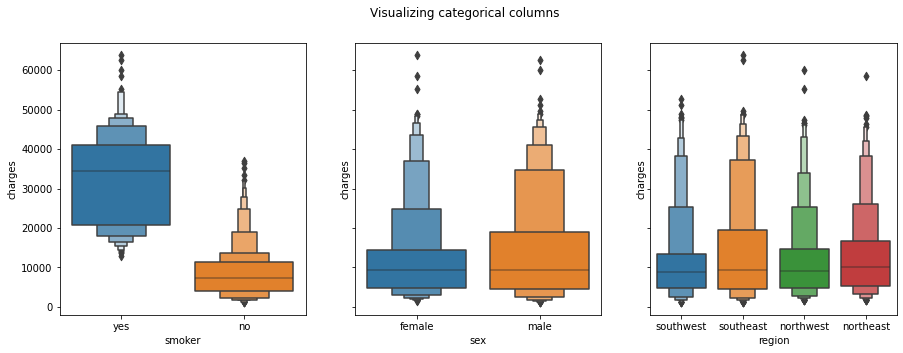

In [ ]:
# visualizing categorical columns v/s charges 
fig, axes = plt.subplots(1,3, figsize=(15,5), sharey=True) # plotting a graph by sharing nrows( no: of rows) as 1 and ncols (no: of columns) as 3
#The figsize argument specifies the size of the figure in inches.
# The sharey argument specifies whether the y-axes of the subplots should be shared.
fig.suptitle('Visualizing categorical columns')
sns.boxenplot(x='smoker', y= 'charges', data=insurance_dataset, ax=axes[0])
#The x argument specifies the column to use for the x-axis, and the y argument specifies the column to use for the y-axis.
# The data argument specifies the dataframe to use for the plot, and the ax argument specifies the Axes object to use for the plot.
sns.boxenplot(x='sex', y= 'charges', data=insurance_dataset, ax=axes[1])
sns.boxenplot(x='region', y= 'charges', data=insurance_dataset, ax=axes[2])

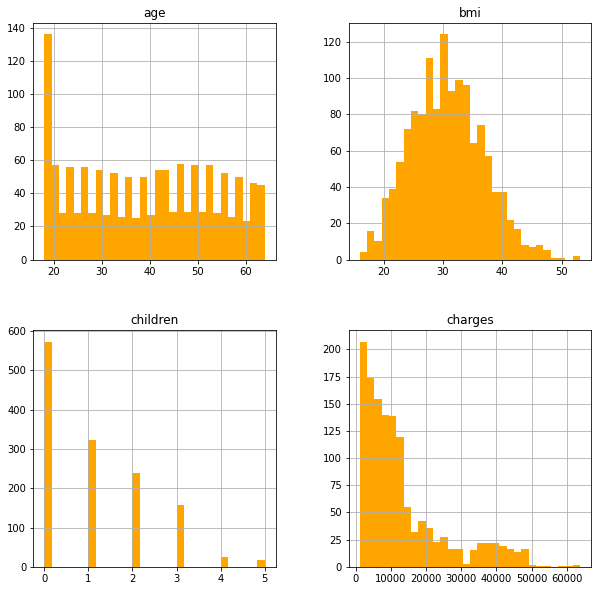

In [ ]:
#Visualizing  Numerical columns

insurance_dataset[['age','bmi','children','charges']].hist(bins=30, figsize=(10,10), color='orange') #the numerical columns are plotted using histogram by 
#specify the number of bins and the color of the bars, respectively.
plt.show()

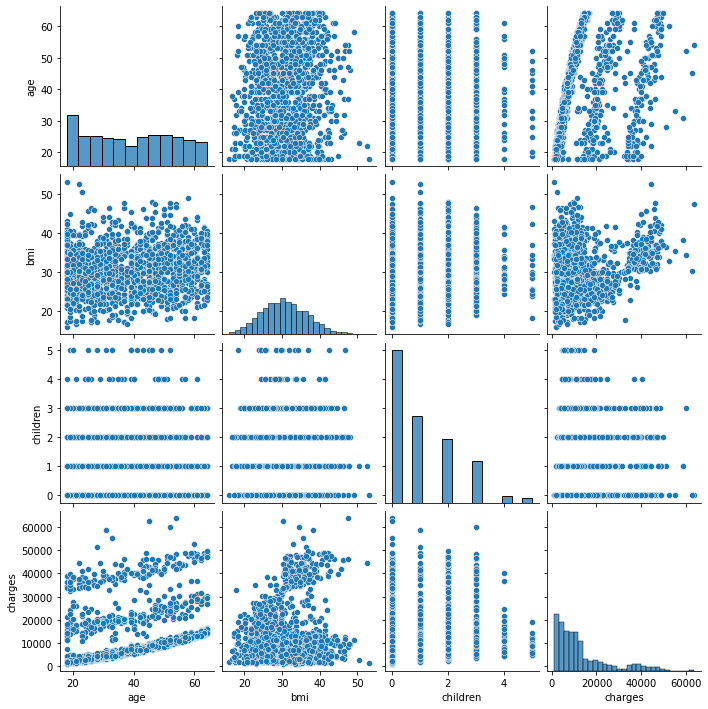

In [ ]:
sns.pairplot(insurance_dataset)
plt.show()

###Data Analysis

In [ ]:
# statistical Measures of the dataset
insurance_dataset.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
#Distribution of gender colum
insurance_dataset['sex'].value_counts()

male      675
female    662
Name: sex, dtype: int64

In [ ]:
#Distribution of smoking colum
insurance_dataset['smoker'].value_counts()

no     1063
yes     274
Name: smoker, dtype: int64

In [ ]:
#Distribution of region colum
insurance_dataset['region'].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

In [ ]:
#Distribution of children colum
insurance_dataset['children'].value_counts()

0.0    573
1.0    324
2.0    240
3.0    157
4.0     25
5.0     18
Name: children, dtype: int64

##Data Pre-Processing

In [ ]:
insurance_dataset.head() #displaying first 5 rows from dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0.0,yes,southwest,16884.92400
1,18,male,33.770,1.0,no,southeast,1725.55230
2,28,male,33.000,3.0,no,southeast,4449.46200
3,33,male,22.705,0.0,no,northwest,21984.47061
4,32,male,28.880,0.0,no,northwest,3866.85520


Encoding the categorical columns

In [ ]:
# encoding sex column , male as 1,female as 0
# encoding smoker column , yes as 1,no as 0
# encoding region column , southwest as 3,southeast as 2, northwest as 1 and northeast as 0

from sklearn.preprocessing import LabelEncoder #LabelEncoder class from sklearn.preprocessing
# to perform the label encoding.

for c in insurance_dataset.columns: 
    if insurance_dataset[c].dtype=='object': #performing label encoding on the columns with data type "object".
        lbl = LabelEncoder()
        lbl.fit(list(insurance_dataset[c].values))
        insurance_dataset[c] = lbl.transform(insurance_dataset[c].values)
        #The fit method is used to fit the encoder to the data, 
        #and the transform method is used to transform the data using the fitted encoder.
        # The resulting encoded data is then stored back in the original dataframe.
        
insurance_dataset.head(5) # displaying encoded dataframe 

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0.0,1,3,16884.92400
1,18,1,33.770,1.0,0,2,1725.55230
2,28,1,33.000,3.0,0,2,4449.46200
3,33,1,22.705,0.0,0,1,21984.47061
4,32,1,28.880,0.0,0,1,3866.85520


In [ ]:
insurance_dataset.head() #displaying first 5 rows

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0.0,1,3,16884.92400
1,18,1,33.770,1.0,0,2,1725.55230
2,28,1,33.000,3.0,0,2,4449.46200
3,33,1,22.705,0.0,0,1,21984.47061
4,32,1,28.880,0.0,0,1,3866.85520


##Feature Selection

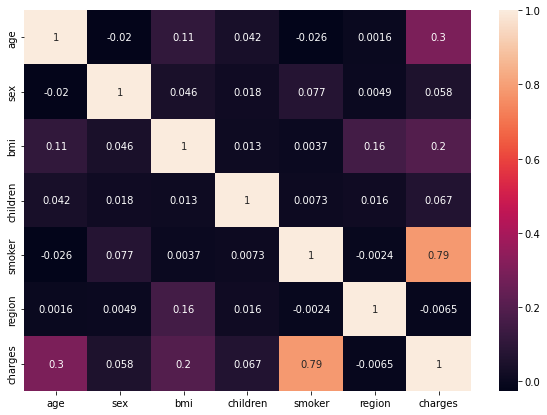

In [ ]:
#Feature Selection/ correlation using heatmap
plt.figure(figsize=(10,7)) #specifying the figure size for plotting heatmap
sns.heatmap(insurance_dataset.corr(), annot = True) #the corr function is used to calculate
# the correlations between the columns in the dataframe
#The annot argument specifies whether the values should be annotated on the heatmap.
plt.show()

#EXPERIMENTS


##Experiment 1: Health Insurance Cost Prediction Using 3 models

###1.1 Insurance cost prediction using linear regression model

Splitting the Features and Target

In [ ]:
X = insurance_dataset.drop(columns='charges', axis=1) #assigning all columns except charges column to X variable as independand variable
Y = insurance_dataset['charges'] # assigning charges column to Y variable as dependable variable

In [ ]:
X = insurance_dataset.drop(columns='charges', axis=1) 
#assigning all columns except charges
# column to X variable as independand variable
print(X.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')


In [ ]:
Y = insurance_dataset['charges'] 
# assigning charges column to Y variable as dependable variable
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64


Splitting the data into Training data and Testing Data

In [ ]:
#libraries for data splitting
from sklearn.model_selection import train_test_split


In [ ]:
#Splitting the data into Training data & Testing Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# train_test_split is a function used to splits the input dataset into two subsets: a training set and a test set
#Here,  the test set will be 20% of the size of the input dataset and the training set will be the remaining 80%.

In [ ]:
 #displaying no of rows and columns of X,X_train and X_test
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_train shpae: ", Y_train.shape)
print("Y_test shape: ", Y_test.shape)

X_train shape:  (1069, 6)
X_test shape:  (268, 6)
Y_train shpae:  (1069,)
Y_test shape:  (268,)


IMPLEMENTING LINEAR REGRESSION MODEL

In [ ]:
from sklearn.linear_model import LinearRegression #importing library for performing linear regression

In [ ]:
#Model Training
# Create a linear regression model and fit it to the train set
lr = LinearRegression()
lr.fit(X_train,Y_train)


LinearRegression()

In [ ]:
## Making predictions on the test set
Y_pred1 = lr.predict(X_test)
df = pd.DataFrame({'Actual':Y_test,'Linear Regression':Y_pred1})
df

,Actual,Linear Regression
900,8688.85885,8080.450186
1064,5708.86700,5592.871120
1256,11436.73815,14378.298655
298,38746.35510,31731.819541
237,4463.20510,9158.356944
...,...,...
534,13831.11520,16952.682449
542,13887.20400,15496.907965
760,3925.75820,6303.385531
1284,47403.88000,38248.332909


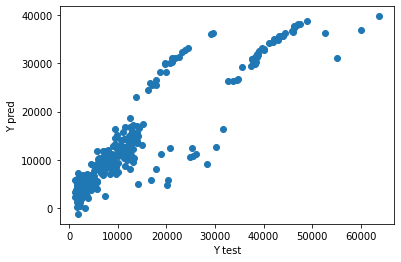

In [ ]:
# Plot the predictions on the test set as a scatter plot
plt.scatter(Y_test, Y_pred1)
plt.xlabel('Y test')
plt.ylabel('Y pred')
plt.show() # Show the plot

Evaluating the linear regression model

In [ ]:
from sklearn import metrics
score1 = metrics.r2_score(Y_test,Y_pred1)
mae = metrics.mean_absolute_error(Y_test,Y_pred1)
print("R squared vale : ",(score1))
print("MAE value: ",(mae))


R squared vale :  0.8068466322629112
MAE value:  4182.353155288296


In [ ]:
# prediction on training data
print("prediction on training data\n")
training_data_prediction =lr.predict(X_train)
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)
#Mean Absolute Error (MAE)
mae_train = metrics.mean_absolute_error(Y_train,training_data_prediction)
print("MAE value: ",(mae_train))

# prediction on test data
print("\nprediction on test data\n")
test_data_prediction =lr.predict(X_test)
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)
#Mean Absolute Error (MAE)
mae_test = metrics.mean_absolute_error(Y_test,test_data_prediction)
print("MAE value: ",(mae_test))

prediction on training data

R squared vale :  0.7297182858804965
MAE value:  4181.3215781049175

prediction on test data

R squared vale :  0.8068466322629112
MAE value:  4182.353155288296


In [ ]:
# Create a dictionary with the scores
scores = {'R2 Score': [r2_train, r2_test], 'MAE': [mae_train, mae_test]}

# Create a DataFrame from the dictionary
scores_df = pd.DataFrame(scores, index=['Training', 'Testing'])

# Display the DataFrame
scores_df

,R2 Score,MAE
Training,0.729718,4181.321578
Testing,0.806847,4182.353155


PREDICTING INSURANCE COST FOR NEW CUSTOMER



In [ ]:
data = {'age':40,  'sex' : 1, 'bmi':40.3, 'children':5, 'smoker':1, 'region':2}
index = [0]
New_cus = pd.DataFrame(data, index)
New_cus

,age,sex,bmi,children,smoker,region
0,40,1,40.3,5,1,2


In [ ]:
#predicting cost for the above customer
cost_pred = lr.predict(New_cus)
print("The medical insurance cost of the new customer is: ", cost_pred)

The medical insurance cost of the new customer is:  [36648.83224315]


###1.2 Insurance cost Prediction using RandomForestRegressor

Splitting the Features and Target

In [ ]:
#Splitting the Features and Target

X = insurance_dataset.drop(columns='charges', axis=1) #assigning all columns except charges column to X variable as independand variable
Y = insurance_dataset['charges'] # assigning charges column to Y variable as dependable variable

In [ ]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    0  27.900       0.0       1       3
1      18    1  33.770       1.0       0       2
2      28    1  33.000       3.0       0       2
3      33    1  22.705       0.0       0       1
4      32    1  28.880       0.0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970       3.0       0       1
1334   18    0  31.920       0.0       0       0
1335   18    0  36.850       0.0       0       2
1336   21    0  25.800       0.0       0       3
1337   61    0  29.070       0.0       1       1

[1337 rows x 6 columns]


In [ ]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64


In [ ]:
#libraries for data splitting
from sklearn.model_selection import train_test_split

#Splitting the data into Training data & Testing Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# train_test_split is a function used to splits the input dataset into two subsets: a training set and a test set
#Here,  the test set will be 20% of the size of the input dataset and the training set will be the remaining 80%.

print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_train shpae: ", Y_train.shape)
print("Y_test shape: ", Y_test.shape)

X_train shape:  (1069, 6)
X_test shape:  (268, 6)
Y_train shpae:  (1069,)
Y_test shape:  (268,)


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Load your random forest model
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)

Y_pred2 = rf.predict(X_test)

df = pd.DataFrame({'Actual':Y_test,'RandomForestRegressor':Y_pred2})
df

,Actual,RandomForestRegressor
900,8688.85885,10132.544913
1064,5708.86700,6131.565986
1256,11436.73815,12732.907117
298,38746.35510,42837.194320
237,4463.20510,6898.183973
...,...,...
534,13831.11520,14285.888318
542,13887.20400,14428.552952
760,3925.75820,12920.020037
1284,47403.88000,47904.603145


EVALUATING THE RANDOM FOREST REGRESSOR MODEL

In [ ]:
# prediction on training data
print("prediction on training data\n")
training_data_prediction =rf.predict(X_train)
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)
#Mean Absolute Error (MAE)
mae_train = metrics.mean_absolute_error(Y_train,training_data_prediction)
print("MAE value: ",(mae_train))

# prediction on test data
print("\nprediction on test data\n")
test_data_prediction =rf.predict(X_test)
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)
#Mean Absolute Error (MAE)
mae_test = metrics.mean_absolute_error(Y_test,test_data_prediction)
print("MAE value: ",(mae_test))

prediction on training data

R squared vale :  0.9741286661282471
MAE value:  1052.16850449579

prediction on test data

R squared vale :  0.8817970467925001
MAE value:  2583.777875744777


In [ ]:
# Create a dictionary with the scores
scores = {'R2 Score': [r2_train, r2_test], 'MAE': [mae_train, mae_test]}

# Create a DataFrame from the dictionary
scores_df = pd.DataFrame(scores, index=['Training', 'Testing'])

# Display the DataFrame
scores_df

,R2 Score,MAE
Training,0.974129,1052.168504
Testing,0.881797,2583.777876


PREDICTING INSURANCE COST FOR NEW CUSTOMER

In [ ]:
data = {'age':40,  'sex' : 1, 'bmi':40.3, 'children':5, 'smoker':1, 'region':2}
index = [0]
New_cus = pd.DataFrame(data, index)
New_cus

cost_pred = rf.predict(New_cus)
print("The medical insurance cost of the new customer is: ", cost_pred)

The medical insurance cost of the new customer is:  [42188.6087715]


###1.3 Insurance cost Prediction Using  Gradient Boosting Regressor

Splitting the Features and Target

In [ ]:
X = insurance_dataset.drop(columns='charges', axis=1) #assigning all columns except charges column to X variable as independand variable
Y = insurance_dataset['charges'] # assigning charges column to Y variable as dependable variable


In [ ]:
print(X)

      age  sex     bmi  children  smoker  region
0      19    0  27.900       0.0       1       3
1      18    1  33.770       1.0       0       2
2      28    1  33.000       3.0       0       2
3      33    1  22.705       0.0       0       1
4      32    1  28.880       0.0       0       1
...   ...  ...     ...       ...     ...     ...
1333   50    1  30.970       3.0       0       1
1334   18    0  31.920       0.0       0       0
1335   18    0  36.850       0.0       0       2
1336   21    0  25.800       0.0       0       3
1337   61    0  29.070       0.0       1       1

[1337 rows x 6 columns]


In [ ]:
print(Y)

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1337, dtype: float64


Splitting the data into Training data and Testing Data

In [ ]:
#libraries for data splitting
from sklearn.model_selection import train_test_split

#Splitting the data into Training data & Testing Data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
# train_test_split is a function used to splits the input dataset into two subsets: a training set and a test set
#Here,  the test set will be 20% of the size of the input dataset and the training set will be the remaining 80%.

 #displaying no of rows and columns of X,X_train and X_test
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_train shpae: ", Y_train.shape)
print("Y_test shape: ", Y_test.shape)

X_train shape:  (1069, 6)
X_test shape:  (268, 6)
Y_train shpae:  (1069,)
Y_test shape:  (268,)


IMPLEMENTING GRADIENT BOOSTING REGRESSOR MODEL

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
#Model Training
# Create a Gradient Boosting Regressor model and fit it to the train set
gr = GradientBoostingRegressor()
gr.fit(X_train,Y_train)

#making prediction
y_pred3 = gr.predict(X_test)
df3 = pd.DataFrame({'Actual':Y_test,'GradientBoostingRegressor':y_pred3})
df3

,Actual,GradientBoostingRegressor
900,8688.85885,10503.526620
1064,5708.86700,7231.162694
1256,11436.73815,13518.524149
298,38746.35510,38985.408853
237,4463.20510,6291.919618
...,...,...
534,13831.11520,13890.363202
542,13887.20400,14407.858079
760,3925.75820,7447.372254
1284,47403.88000,49312.338846


EVALUATING THE GRADIENT BOODTING REGRESSOR MODEL

In [ ]:

# prediction on training data
print("prediction on training data\n")
training_data_prediction =gr.predict(X_train)
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)
#Mean Absolute Error (MAE)
mae_train = metrics.mean_absolute_error(Y_train,training_data_prediction)
print("MAE value: ",(mae_train))

#ac1=round(r2_train,1)*100

# prediction on test data
print("\nprediction on test data\n")
test_data_prediction =gr.predict(X_test)
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)
#Mean Absolute Error (MAE)
mae_test = metrics.mean_absolute_error(Y_test,test_data_prediction)
print("MAE value: ",(mae_test))

prediction on training data

R squared vale :  0.8931701840243523
MAE value:  2092.6925088825715

prediction on test data

R squared vale :  0.898880898233836
MAE value:  2553.1788305768937


In [ ]:
# Create a dictionary with the scores

scores = {'R2 Score': [r2_train, r2_test], 'MAE': [mae_train, mae_test]}

# Create a DataFrame from the dictionary
scores_df = pd.DataFrame(scores, index=['Training', 'Testing'])

# Display the DataFrame
scores_df

,R2 Score,MAE
Training,0.893170,2092.692509
Testing,0.898881,2553.178831


PREDICTING INSURANCE COST FOR NEW CUSTOMER

In [ ]:
data = {'age':40,  'sex' : 1, 'bmi':40.3, 'children':5, 'smoker':1, 'region':2}
index = [0]
New_cus = pd.DataFrame(data, index)
New_cus

cost_pred = gr.predict(New_cus)
print("The medical insurance cost of the new customer is: ", cost_pred)


The medical insurance cost of the new customer is:  [42618.9155463]


In [ ]:
#Predicting cost for new customer using feature and target column
gr = GradientBoostingRegressor()
gr.fit(X,Y)

new_pred = gr.predict(New_cus)
print("Medical Insurance cost for New Customer is : ",new_pred)

Medical Insurance cost for New Customer is :  [42353.55597392]


##Model Evaluation

In [ ]:
lr = LinearRegression()
lr.fit(X_train,Y_train)
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)
gr = GradientBoostingRegressor()
gr.fit(X_train,Y_train)

y_pred1 = lr.predict(X_test)
y_pred2 = rf.predict(X_test)
y_pred3 = gr.predict(X_test)

df = pd.DataFrame({'Actual':Y_test,'LinearRegression':y_pred1,'RandomForestRegressor':y_pred2,'GradientBoostingRegressor':y_pred3})

df

,Actual,LinearRegression,RandomForestRegressor,GradientBoostingRegressor
900,8688.85885,8080.450186,10114.687948,10503.526620
1064,5708.86700,5592.871120,6930.081711,7231.162694
1256,11436.73815,14378.298655,12463.430496,13518.524149
298,38746.35510,31731.819541,43992.835724,38985.408853
237,4463.20510,9158.356944,6223.541034,6291.919618
...,...,...,...,...
534,13831.11520,16952.682449,14696.334846,13890.363202
542,13887.20400,15496.907965,14623.843049,14407.858079
760,3925.75820,6303.385531,12760.796435,7447.372254
1284,47403.88000,38248.332909,47830.559518,49312.338846


Compare Performance Visually

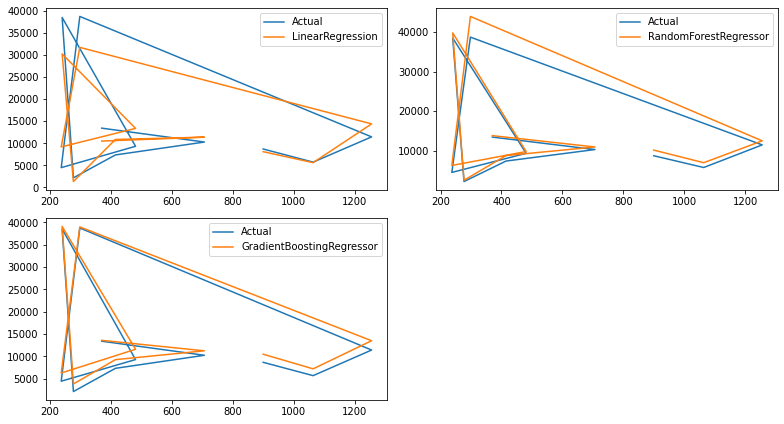

In [ ]:
import matplotlib.pyplot as plt #importing library for plotting graph

# Set the figure size to be twice as wide
plt.figure(figsize=(11, 6))
plt.subplot(221) ## Create the subplot
# Plot the data
plt.plot(df['Actual'].iloc[0:11],label='Actual')
plt.plot(df['LinearRegression'].iloc[0:11],label="LinearRegression")
plt.legend() # Add a legend


plt.subplot(222)
plt.plot(df['Actual'].iloc[0:11],label='Actual')
plt.plot(df['RandomForestRegressor'].iloc[0:11],label="RandomForestRegressor")
plt.legend()

plt.subplot(223)
plt.plot(df['Actual'].iloc[0:11],label='Actual')
plt.plot(df['GradientBoostingRegressor'].iloc[0:11],label="GradientBoostingRegressor")

plt.tight_layout() # Show the plot

plt.legend()

Evaluating Algorithm

In [ ]:
from sklearn import metrics
r2_score1 = metrics.r2_score(Y_test,y_pred1)
r2_score2 = metrics.r2_score(Y_test,y_pred2)
r2_score3 = metrics.r2_score(Y_test,y_pred3)

mae1 = metrics.mean_absolute_error(Y_test,y_pred1)
mae2 = metrics.mean_absolute_error(Y_test,y_pred2)
mae3 = metrics.mean_absolute_error(Y_test,y_pred3)

# Create a dictionary with the scores
scores = {'R2 Score': [r2_score1, r2_score2, r2_score3], 'MAE': [mae1, mae2, mae3]}

# Create a DataFrame from the dictionary
scores_df = pd.DataFrame(scores,index=['LinearRegression', 'RandomForestRegressor', 'GradientBoostingRegressor'])

# Display the DataFrame
scores_df


,R2 Score,MAE
LinearRegression,0.806847,4182.353155
RandomForestRegressor,0.879012,2625.743973
GradientBoostingRegressor,0.900597,2522.447027


Linear Regression : 80 %
Random Forest Regressor : 90 %
Gradient Boosting Regressor : 90 %


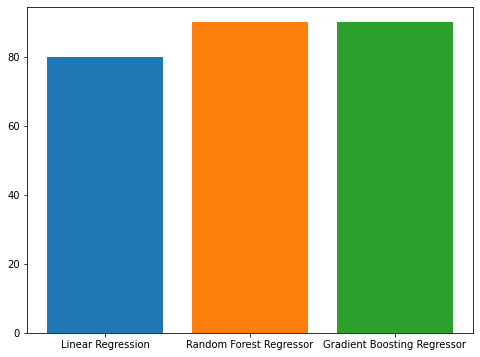

In [ ]:

regressors = [('Linear Regression', lr), ('Random Forest Regressor', rf), ('Gradient Boosting Regressor', gr)]

from sklearn.metrics import r2_score

for regressor_name, regressor in regressors:
 
    # Fit regressor to the training set
    regressor.fit(X_train, Y_train)    
   
    # Predict 
    y_pred = regressor.predict(X_test)
    accuracy = round(r2_score(Y_test,y_pred),1)*100
    
    

   
    # Evaluate  accuracy on the test set
    print('{:s} : {:.0f} %'.format(regressor_name, accuracy))
    plt.rcParams["figure.figsize"] = (8,6)
    plt.bar(regressor_name,accuracy)



In [ ]:
from sklearn import metrics
r2_score1 = metrics.r2_score(Y_test,y_pred1)
r2_score2 = metrics.r2_score(Y_test,y_pred2)
r2_score3 = metrics.r2_score(Y_test,y_pred3)

mae1 = metrics.mean_absolute_error(Y_test,y_pred1)
mae2 = metrics.mean_absolute_error(Y_test,y_pred2)
mae3 = metrics.mean_absolute_error(Y_test,y_pred3)

ac1=round(r2_score1,1)*100
ac2=round(r2_score2,1)*100
ac3=round(r2_score3,1)*100

# Create a dictionary with the scores
scores = {'R2 Score': [r2_score1, r2_score2, r2_score3], 'MAE': [mae1, mae2, mae3], 'ACCURACY': [ac1, ac2, ac3]}

# Create a DataFrame from the dictionary
scores_df = pd.DataFrame(scores, index=['LinearRegression', 'RandomForestRegressor', 'GradientBoostingRegressor'])

# Display the DataFrame
scores_df

,R2 Score,MAE,ACCURACY
LinearRegression,0.806847,4182.353155,80.0
RandomForestRegressor,0.879012,2625.743973,90.0
GradientBoostingRegressor,0.900597,2522.447027,90.0


##Experiment 2: Clustering

Data Collection and Analysis

In [ ]:
#Importing the Dependencies
import pandas as pd
# loading the data from csv file to a Pandas DataFrame
insurance_dataset = pd.read_csv('/content/insurance.csv')

In [ ]:
# first 5 rows in the dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0.0,yes,southwest,16884.92400
1,18,male,33.770,1.0,no,southeast,1725.55230
2,28,male,33.000,3.0,no,southeast,4449.46200
3,33,male,22.705,0.0,no,northwest,21984.47061
4,32,male,28.880,0.0,no,northwest,3866.85520


In [ ]:
# displaying total number of rows and columns of the dataset
insurance_dataset.shape

(1339, 7)

In [ ]:
# getting some informations about the dataset
insurance_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1339 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1339 non-null   float64
 3   children  1338 non-null   float64
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1339 non-null   float64
dtypes: float64(3), int64(1), object(3)
memory usage: 73.4+ KB


In [ ]:
# checking for missing values
insurance_dataset.isnull().sum()

age         0
sex         1
bmi         0
children    1
smoker      1
region      1
charges     0
dtype: int64

In [ ]:
# Drop row that has all NaN values
insurance_dataset.dropna(inplace=True) #dropna() method used to drop rows with NaN (Not a Number) and None values from pandas DataFrame
# and (inplace=True) which is used to remove NAN values from the existing DataFrame.
insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0.0,yes,southwest,16884.92400
1,18,male,33.770,1.0,no,southeast,1725.55230
2,28,male,33.000,3.0,no,southeast,4449.46200
3,33,male,22.705,0.0,no,northwest,21984.47061
4,32,male,28.880,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3.0,no,northwest,10600.54830
1334,18,female,31.920,0.0,no,northeast,2205.98080
1335,18,female,36.850,0.0,no,southeast,1629.83350
1336,21,female,25.800,0.0,no,southwest,2007.94500


In [ ]:
insurance_dataset.isnull().sum() #checking null values again


age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
insurance_dataset.shape

(1337, 7)

In [ ]:
# Displaying  statistics about the dataset
insurance_dataset.describe

<bound method NDFrame.describe of       age  sex     bmi  children  smoker  region      charges
0      19    0  27.900       0.0       1       3  16884.92400
1      18    1  33.770       1.0       0       2   1725.55230
2      28    1  33.000       3.0       0       2   4449.46200
3      33    1  22.705       0.0       0       1  21984.47061
4      32    1  28.880       0.0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970       3.0       0       1  10600.54830
1334   18    0  31.920       0.0       0       0   2205.98080
1335   18    0  36.850       0.0       0       2   1629.83350
1336   21    0  25.800       0.0       0       3   2007.94500
1337   61    0  29.070       0.0       1       1  29141.36030

[1337 rows x 7 columns]>

Data Preprocessing 
Encoding Categorical columns

In [ ]:
# encoding sex column , male as 1,female as 0
# encoding smoker column , yes as 1,no as 0
# encoding region column , southwest as 3,southeast as 2, northwest as 1 and northeast as 0

from sklearn.preprocessing import LabelEncoder #LabelEncoder class from sklearn.preprocessing to perform the label encoding.

for c in insurance_dataset.columns: 
    if insurance_dataset[c].dtype=='object': #performing label encoding on the columns with data type "object".
        lbl = LabelEncoder()
        lbl.fit(list(insurance_dataset[c].values))
        insurance_dataset[c] = lbl.transform(insurance_dataset[c].values)
        #The fit method is used to fit the encoder to the data, 
        #and the transform method is used to transform the data using the fitted encoder.
        # The resulting encoded data is then stored back in the original dataframe.
        
insurance_dataset # displaying encoded dataframe 

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0.0,1,3,16884.92400
1,18,1,33.770,1.0,0,2,1725.55230
2,28,1,33.000,3.0,0,2,4449.46200
3,33,1,22.705,0.0,0,1,21984.47061
4,32,1,28.880,0.0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3.0,0,1,10600.54830
1334,18,0,31.920,0.0,0,0,2205.98080
1335,18,0,36.850,0.0,0,2,1629.83350
1336,21,0,25.800,0.0,0,3,2007.94500


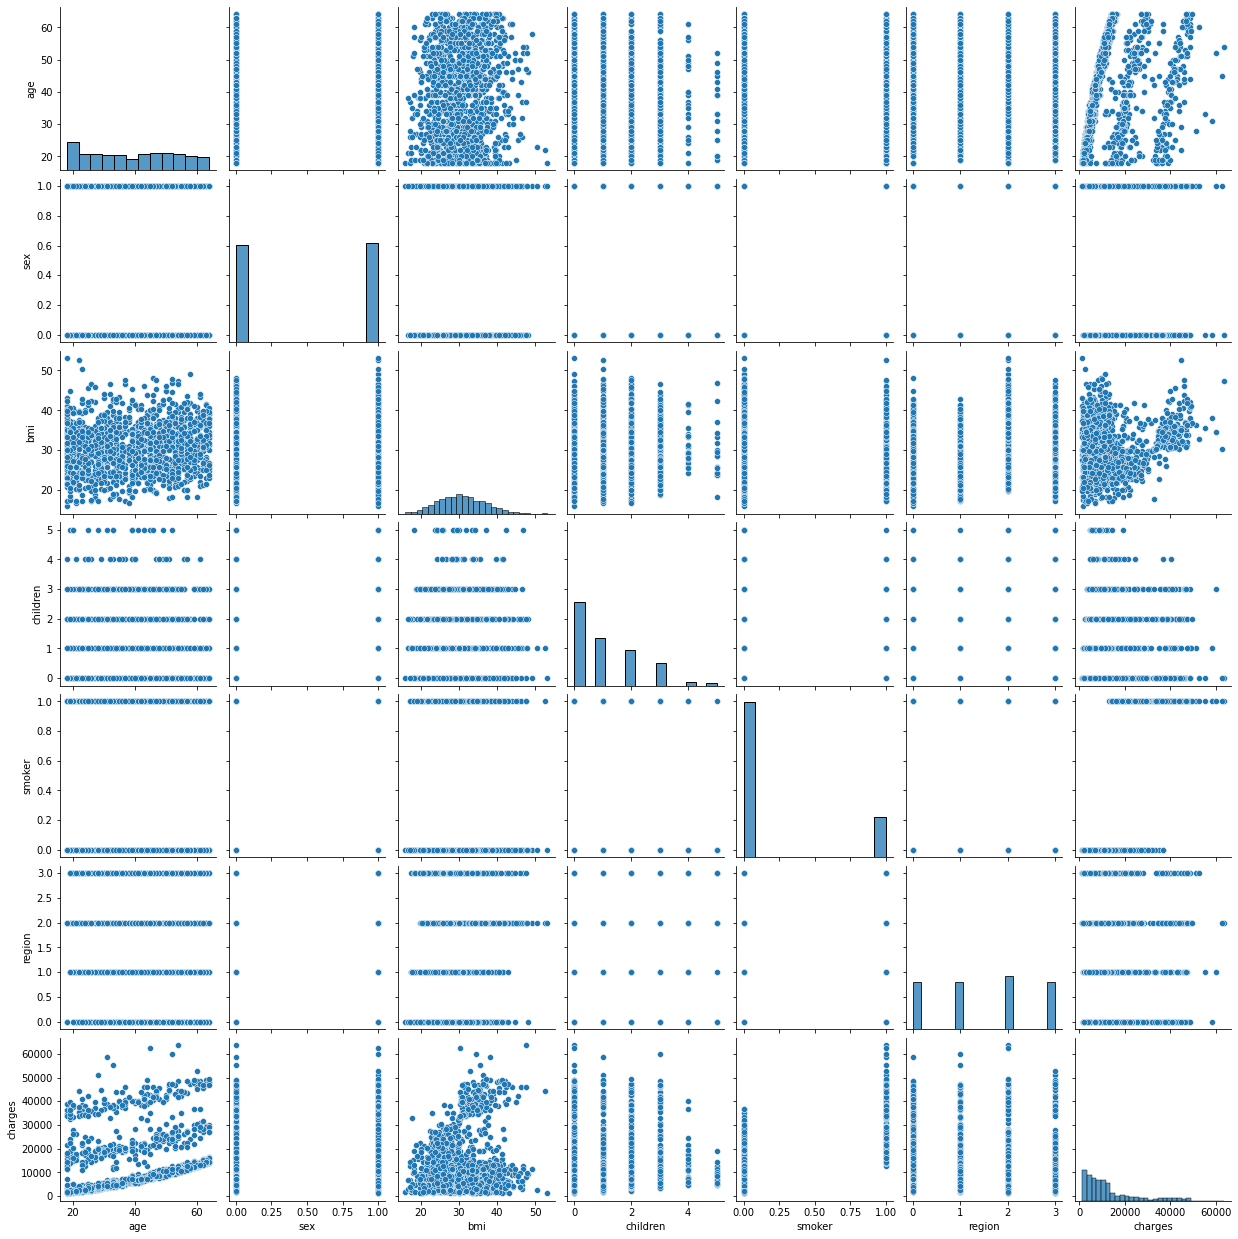

In [ ]:
sns.pairplot(insurance_dataset)
plt.show()

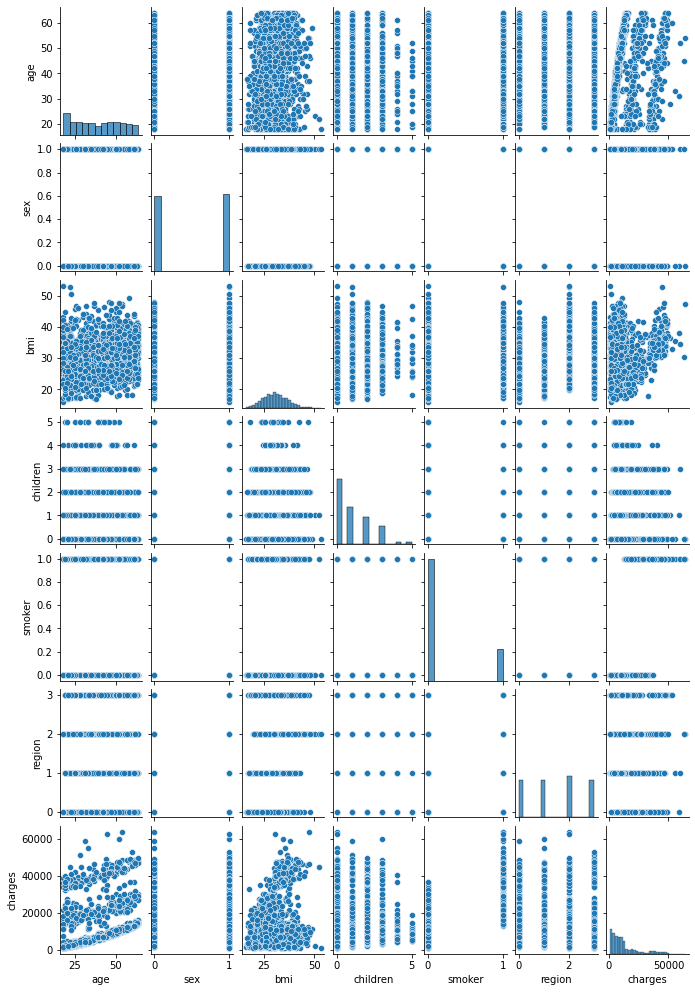

In [ ]:
sns.pairplot(insurance_dataset, height=2, aspect=0.7)
plt.show()

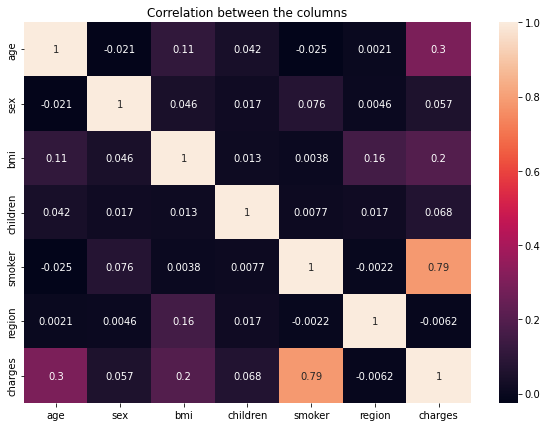

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
#Feature Selection/ correlation using heatmap
plt.figure(figsize=(10,7)) #specifying the figure size for plotting heatmap
sns.heatmap(insurance_dataset.corr(), annot = True) #the corr function is used to calculate the correlations between the columns in the dataframe
#The annot argument specifies whether the values should be annotated on the heatmap.
plt.title('Correlation between the columns')
plt.show()

CLUSTERING IMPLEMENTATION

In [ ]:
#removing target column from our dataset
df = insurance_dataset.drop(columns='charges', axis=1) 
df

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0.0,1,3
1,18,1,33.770,1.0,0,2
2,28,1,33.000,3.0,0,2
3,33,1,22.705,0.0,0,1
4,32,1,28.880,0.0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3.0,0,1
1334,18,0,31.920,0.0,0,0
1335,18,0,36.850,0.0,0,2
1336,21,0,25.800,0.0,0,3


In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')

In [ ]:

features_cluster = ['age', 'sex', 'bmi', 'children', 'smoker','region']
features_cluster

['age', 'sex', 'bmi', 'children', 'smoker', 'region']

Choosing the number of clusters

WCSS -> Within Clusters Sum of Squares

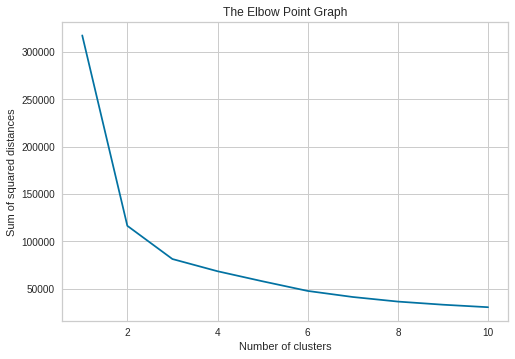

In [ ]:
#importing libraries for kmean
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans

# finding wcss value for different number of clusters
wss=[]
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df)
    wss.append(kmeans.inertia_)

# plot an elbow graph

plt.plot(range(1,11), wss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.show()

Optimum Number of Clusters = 3

finding out exact Number of Clusters using elbowvisualizer

Training the k-Means Clustering Model

In [ ]:
pip install yellowbrick


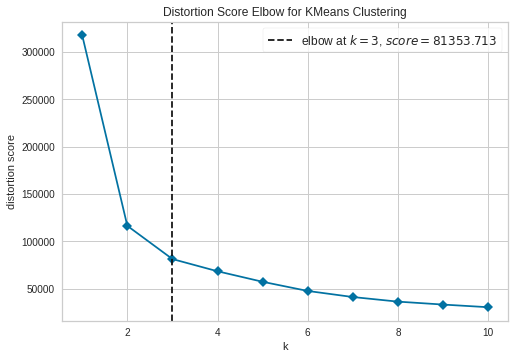

In [ ]:

from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11), timings = False)
visualizer.fit(df)
visualizer.show()


Silhouette coefficient score

In [ ]:
#visualizing the silhouette_score for each clusters to find the optimum 
from sklearn.metrics import silhouette_score

for i in range(2,10):
    kmeans = KMeans(n_clusters=i, max_iter=100)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    print("For cluster: {}, the silhouette score is: {}".format(i,score))
    plt.show()

For cluster: 2, the silhouette score is: 0.512279086278329
For cluster: 3, the silhouette score is: 0.3976595815919167
For cluster: 4, the silhouette score is: 0.3391641746085227
For cluster: 5, the silhouette score is: 0.31675317003967635
For cluster: 6, the silhouette score is: 0.32306325424880006
For cluster: 7, the silhouette score is: 0.315595959478755
For cluster: 8, the silhouette score is: 0.3128568333090672
For cluster: 9, the silhouette score is: 0.3030258605491241


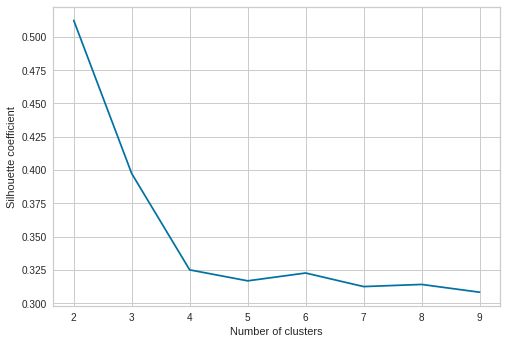

In [ ]:
silhouette_coefficients = []
for i in range(2,10):
    kmeans = KMeans(n_clusters=i, max_iter=100)
    kmeans.fit(df)
    score = silhouette_score(df, kmeans.labels_)
    silhouette_coefficients.append(score)
    
plt.plot(range(2,10), silhouette_coefficients)
plt.xticks(range(2,10))
plt.xlabel("Number of clusters")
plt.ylabel("Silhouette coefficient")
plt.show()

PCA Method

In [ ]:
#Transform data using PCA for Dimensionality Reduction

from sklearn.decomposition import PCA

pca = PCA()
X = pca.fit_transform(df)
X

array([[-2.03521613e+01, -1.53891911e+00, -9.03865591e-01,
        -1.61155081e+00, -3.59422253e-01,  8.59796047e-01],
       [-2.10053231e+01,  4.35196936e+00,  4.21619112e-03,
        -3.63715949e-01,  4.20224398e-01, -2.96992358e-01],
       [-1.10600136e+01,  3.00429807e+00,  1.96763089e+00,
        -2.52063962e-01,  4.14581926e-01, -2.94496175e-01],
       ...,
       [-2.08288674e+01,  7.41972460e+00, -1.01425998e+00,
        -3.50239224e-01, -5.68372727e-01, -1.25698687e-01],
       [-1.84771574e+01, -3.75135352e+00, -9.05432182e-01,
        -1.67860309e+00, -5.17588991e-01, -1.25079170e-01],
       [ 2.16434969e+01, -2.87700990e+00, -1.20082293e+00,
         3.51395310e-01, -3.24328923e-01,  8.82900967e-01]])

In [ ]:
import numpy as np

kmeans = KMeans(n_clusters=3)
label = kmeans.fit_predict(X)
unique_labels = np.unique(label)

In [ ]:
from yellowbrick.cluster import InterclusterDistance
from yellowbrick.cluster import SilhouetteVisualizer

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f68c8149b20>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=3, random_state=42))

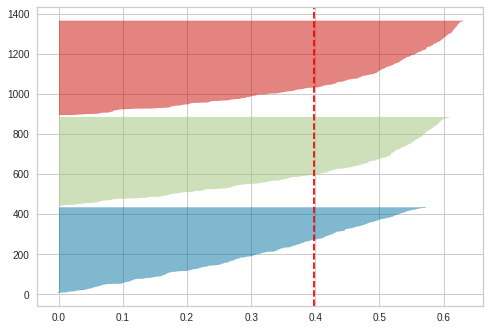

In [ ]:
visualizer = SilhouetteVisualizer(KMeans(3,random_state=42), colors='yellowbrick')
visualizer.fit(df[features_cluster])

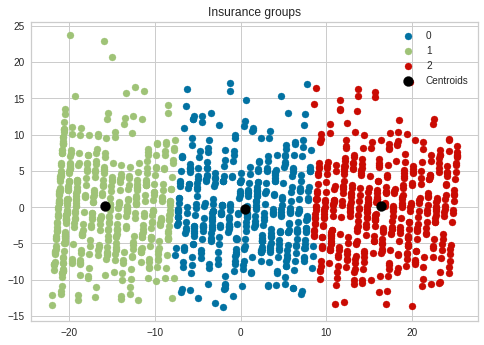

In [ ]:

for i in unique_labels:
    plt.scatter(X[label==i,0], X[label==i,1], label=i)

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='black', label='Centroids')  
plt.legend()
plt.title('Insurance groups')
plt.show()

##Experiment 3:Prediction on wheather a person is smoker or not

In [ ]:
#Importing the Dependencies
import pandas as pd
# loading the data from csv file to a Pandas DataFrame
insurance_dataset = pd.read_csv('/content/insurance.csv')

In [ ]:
# first 5 rows in the dataframe
insurance_dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0.0,yes,southwest,16884.92400
1,18,male,33.770,1.0,no,southeast,1725.55230
2,28,male,33.000,3.0,no,southeast,4449.46200
3,33,male,22.705,0.0,no,northwest,21984.47061
4,32,male,28.880,0.0,no,northwest,3866.85520


In [ ]:
insurance_dataset.shape

(1337, 7)

In [ ]:
# Displaying  statistics about the dataset
insurance_dataset.describe

<bound method NDFrame.describe of       age  sex     bmi  children  smoker  region      charges
0      19    0  27.900       0.0       1       3  16884.92400
1      18    1  33.770       1.0       0       2   1725.55230
2      28    1  33.000       3.0       0       2   4449.46200
3      33    1  22.705       0.0       0       1  21984.47061
4      32    1  28.880       0.0       0       1   3866.85520
...   ...  ...     ...       ...     ...     ...          ...
1333   50    1  30.970       3.0       0       1  10600.54830
1334   18    0  31.920       0.0       0       0   2205.98080
1335   18    0  36.850       0.0       0       2   1629.83350
1336   21    0  25.800       0.0       0       3   2007.94500
1337   61    0  29.070       0.0       1       1  29141.36030

[1337 rows x 7 columns]>

In [ ]:
insurance_dataset.isnull().sum() #checking null values again


age         0
sex         1
bmi         0
children    1
smoker      1
region      1
charges     0
dtype: int64

In [ ]:
# Drop row that has all NaN values
insurance_dataset.dropna(inplace=True) #dropna() method used to drop rows with NaN (Not a Number) and None values from pandas DataFrame
# and (inplace=True) which is used to remove NAN values from the existing DataFrame.
insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0.0,yes,southwest,16884.92400
1,18,male,33.770,1.0,no,southeast,1725.55230
2,28,male,33.000,3.0,no,southeast,4449.46200
3,33,male,22.705,0.0,no,northwest,21984.47061
4,32,male,28.880,0.0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3.0,no,northwest,10600.54830
1334,18,female,31.920,0.0,no,northeast,2205.98080
1335,18,female,36.850,0.0,no,southeast,1629.83350
1336,21,female,25.800,0.0,no,southwest,2007.94500


In [ ]:
# Displaying  statistics about the dataset
insurance_dataset.describe

<bound method NDFrame.describe of       age     sex     bmi  children smoker     region      charges
0      19  female  27.900       0.0    yes  southwest  16884.92400
1      18    male  33.770       1.0     no  southeast   1725.55230
2      28    male  33.000       3.0     no  southeast   4449.46200
3      33    male  22.705       0.0     no  northwest  21984.47061
4      32    male  28.880       0.0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970       3.0     no  northwest  10600.54830
1334   18  female  31.920       0.0     no  northeast   2205.98080
1335   18  female  36.850       0.0     no  southeast   1629.83350
1336   21  female  25.800       0.0     no  southwest   2007.94500
1337   61  female  29.070       0.0    yes  northwest  29141.36030

[1338 rows x 7 columns]>

In [ ]:
insurance_dataset.shape

(1338, 7)

Data Preprocessing

In [ ]:
# encoding sex column , male as 1,female as 0
# encoding smoker column , yes as 1,no as 0
# encoding region column , southwest as 3,southeast as 2, northwest as 1 and northeast as 0

from sklearn.preprocessing import LabelEncoder #LabelEncoder class from sklearn.preprocessing to perform the label encoding.

for c in insurance_dataset.columns: 
    if insurance_dataset[c].dtype=='object': #performing label encoding on the columns with data type "object".
        lbl = LabelEncoder()
        lbl.fit(list(insurance_dataset[c].values))
        insurance_dataset[c] = lbl.transform(insurance_dataset[c].values)
        #The fit method is used to fit the encoder to the data, 
        #and the transform method is used to transform the data using the fitted encoder.
        # The resulting encoded data is then stored back in the original dataframe.
        
insurance_dataset # displaying encoded dataframe 

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0.0,1,3,16884.92400
1,18,1,33.770,1.0,0,2,1725.55230
2,28,1,33.000,3.0,0,2,4449.46200
3,33,1,22.705,0.0,0,1,21984.47061
4,32,1,28.880,0.0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3.0,0,1,10600.54830
1334,18,0,31.920,0.0,0,0,2205.98080
1335,18,0,36.850,0.0,0,2,1629.83350
1336,21,0,25.800,0.0,0,3,2007.94500


In [ ]:
insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0.0,1,3,16884.92400
1,18,1,33.770,1.0,0,2,1725.55230
2,28,1,33.000,3.0,0,2,4449.46200
3,33,1,22.705,0.0,0,1,21984.47061
4,32,1,28.880,0.0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3.0,0,1,10600.54830
1334,18,0,31.920,0.0,0,0,2205.98080
1335,18,0,36.850,0.0,0,2,1629.83350
1336,21,0,25.800,0.0,0,3,2007.94500


Exploratory Data Analysis


Feature Distributions

Age Distribution v/s Target colum(Smoker)

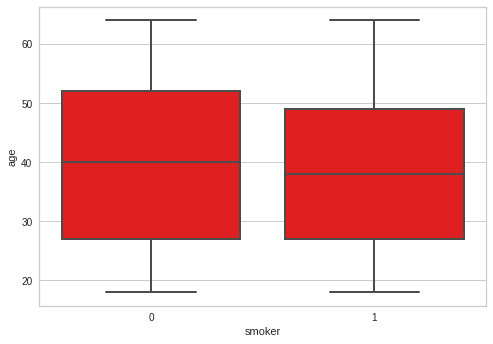

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# distribution of age value
sns.boxplot(x='smoker', y='age', data=insurance_dataset, color='red', linewidth=2)
plt.show()

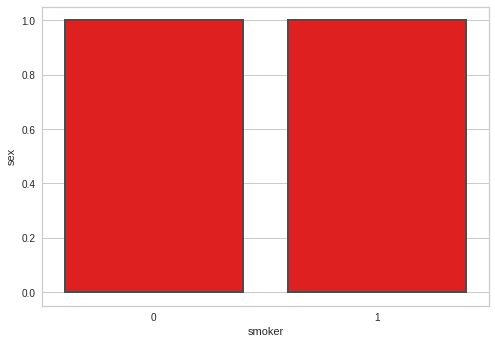

In [ ]:
# distribution of gender value
sns.boxplot(x='smoker', y='sex', data=insurance_dataset, color='red', linewidth=2)
plt.show()

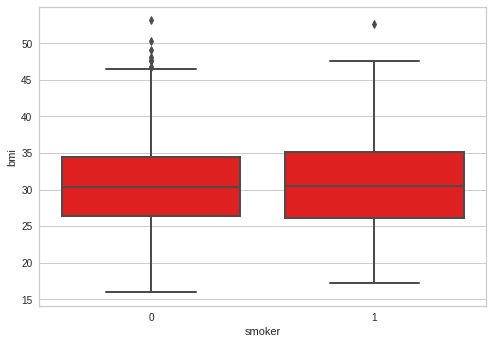

In [ ]:
# distribution of bmi value
sns.boxplot(x='smoker', y='bmi', data=insurance_dataset, color='red', linewidth=2)
plt.show()

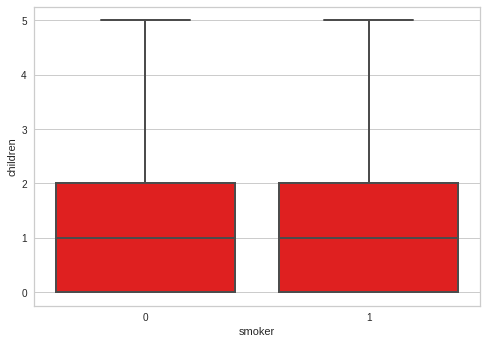

In [ ]:
# distribution of children value
sns.boxplot(x='smoker', y='children', data=insurance_dataset, color='red', linewidth=2)
plt.show()

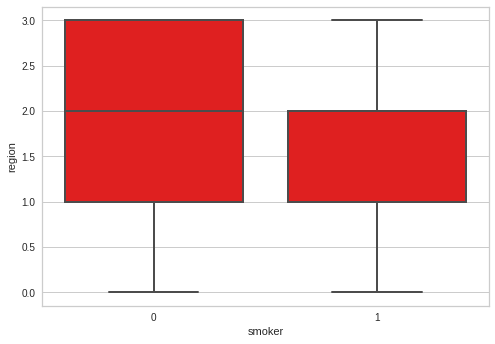

In [ ]:
# distribution of region values
sns.boxplot(x='smoker', y='region', data=insurance_dataset, color='red', linewidth=2)
plt.show()

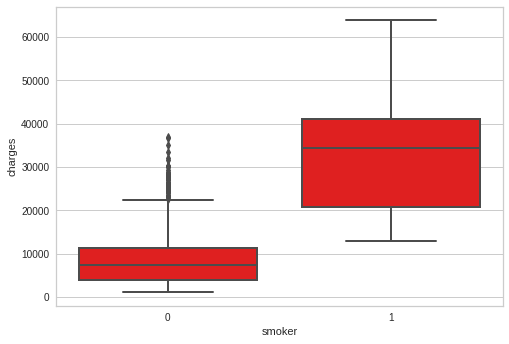

In [ ]:
# distribution of charges 
sns.boxplot(x='smoker', y='charges', data=insurance_dataset, color='red', linewidth=2)
plt.show()

In [ ]:


from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0.0,1,3,16884.92400
1,18,1,33.770,1.0,0,2,1725.55230
2,28,1,33.000,3.0,0,2,4449.46200
3,33,1,22.705,0.0,0,1,21984.47061
4,32,1,28.880,0.0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3.0,0,1,10600.54830
1334,18,0,31.920,0.0,0,0,2205.98080
1335,18,0,36.850,0.0,0,2,1629.83350
1336,21,0,25.800,0.0,0,3,2007.94500


In [ ]:
scaler=StandardScaler()
scaler.fit(insurance_dataset)
insurance_dataset1=scaler.transform(insurance_dataset)
insurance_dataset1

array([[-1.44041773, -1.00977099, -0.45315959, ...,  1.96966039,
         1.34316271,  0.2978567 ],
       [-1.51164747,  0.99032355,  0.50942165, ..., -0.50770174,
         0.43801727, -0.9543806 ],
       [-0.79935006,  0.99032355,  0.3831546 , ..., -0.50770174,
         0.43801727, -0.72937251],
       ...,
       [-1.51164747, -1.00977099,  1.01448983, ..., -0.50770174,
         0.43801727, -0.96228744],
       [-1.29795825, -1.00977099, -0.79752426, ..., -0.50770174,
         1.34316271, -0.9310536 ],
       [ 1.55123139, -1.00977099, -0.26129928, ...,  1.96966039,
        -0.46712816,  1.31029752]])

Making Target variable as Smoker column

Feature Importance towards target column


In [ ]:
X = insurance_dataset.drop(columns='smoker', axis=1) #assigning all columns except smoker column to X variable as independand variable
Y = insurance_dataset['smoker'] # assigning smoker column to Y variable as dependable variable


In [ ]:
X

,age,sex,bmi,children,region,charges
0,19,0,27.900,0.0,3,16884.92400
1,18,1,33.770,1.0,2,1725.55230
2,28,1,33.000,3.0,2,4449.46200
3,33,1,22.705,0.0,1,21984.47061
4,32,1,28.880,0.0,1,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3.0,1,10600.54830
1334,18,0,31.920,0.0,0,2205.98080
1335,18,0,36.850,0.0,2,1629.83350
1336,21,0,25.800,0.0,3,2007.94500


In [ ]:
Y

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1337, dtype: int64

Correlation of features/ Feature selection

Showing Feature Importance of all column


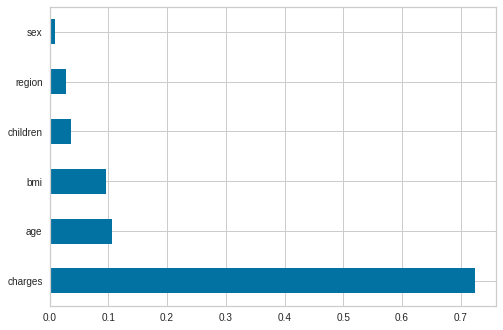

In [ ]:
    #plot graph of feature importances for better visualization
    #Feature importance gives score for each feature of data, the higher the score more important or relevant
    #is the feature towards output variable.
    from sklearn.ensemble import ExtraTreesClassifier

    print("Showing Feature Importance of all column")
    model = ExtraTreesClassifier()
    model.fit(X,Y)
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.nlargest(25).plot(kind='barh')
    plt.show()   

###3.1 Predicting wheather the person is smoker or not using Decision Tree Algorithm

Splitting the data into Training data & Testing Data

In [ ]:
#feature columns
X 

,age,sex,bmi,children,region,charges
0,19,0,27.900,0.0,3,16884.92400
1,18,1,33.770,1.0,2,1725.55230
2,28,1,33.000,3.0,2,4449.46200
3,33,1,22.705,0.0,1,21984.47061
4,32,1,28.880,0.0,1,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3.0,1,10600.54830
1334,18,0,31.920,0.0,0,2205.98080
1335,18,0,36.850,0.0,2,1629.83350
1336,21,0,25.800,0.0,3,2007.94500


In [ ]:
# Target column
Y

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1338, dtype: int64

In [ ]:

#libraries for data splitting
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
 
#displaying no of rows and columns of X,X_train and X_test
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_train shpae: ", Y_train.shape)
print("Y_test shape: ", Y_test.shape)

X_train shape:  (1069, 6)
X_test shape:  (268, 6)
Y_train shpae:  (1069,)
Y_test shape:  (268,)


Decision Tree Implementation

Decision Tree Classifier with criterion gini

Performing training  with giniIndex

In [ ]:
#  performing training with giniIndex.
from sklearn import tree
import pydotplus
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
import matplotlib.image as pltimg

  
    # perform training with giniIndex
    # Creating the classifier object    
    ## tried to achieve more accuracy by adding max_depth option in decisiontree

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)#considering max_depth
clf_gini_wd = DecisionTreeClassifier(criterion='gini', random_state=0)   
    # Performing training
clf_gini.fit(X_train, Y_train)# Fit the model 
clf_gini_wd.fit(X_train, Y_train)# Fit the model 


DecisionTreeClassifier(random_state=0)

Predict the Test set results with criterion gini index


In [ ]:
Y_pred_test_gini_wd = clf_gini_wd.predict(X_test)
Y_pred_test_gini = clf_gini.predict(X_test)
Y_pred_test_gini

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0])

Check accuracy score with criterion gini index


In [ ]:
#calculating accuracy with considering max_depth
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(Y_test, Y_pred_test_gini)))

#here, y_test are the true class labels and y_pred_gini are the predicted class labels in the test-set.

Model accuracy score with criterion gini index: 0.9739


In [ ]:
#calculating accuracy without considering max_depth
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion gini index: {0:0.4f}'. format(accuracy_score(Y_test, Y_pred_test_gini_wd)))

#here, y_test are the true class labels and y_pred_gini are the predicted class labels in the test-set.

Model accuracy score with criterion gini index: 0.9701


In [ ]:
#Compare the train-set and test-set accuracy
#Now, I will compare the train-set and test-set accuracy to check for overfitting.

y_pred_train_gini = clf_gini.predict(X_train)

y_pred_train_gini

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(Y_train, y_pred_train_gini)))

Training-set accuracy score: 0.9663


Check for overfitting and underfitting


In [ ]:
#Checking for overfitting and underfitting
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_gini.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(clf_gini.score(X_test, Y_test)))


Training set score: 0.9663
Test set score: 0.9739


Here, the training-set accuracy score is 0.9663 while the test-set accuracy to be 0.9739. These two values are quite comparable. So, there is no sign of overfitting.



Visualize decision-trees

[Text(0.5, 0.875, 'X[5] <= 15264.587\ngini = 0.32\nsamples = 1069\nvalue = [855, 214]'),
 Text(0.25, 0.625, 'X[5] <= 14453.74\ngini = 0.018\nsamples = 788\nvalue = [781, 7]'),
 Text(0.125, 0.375, 'X[2] <= 17.338\ngini = 0.008\nsamples = 776\nvalue = [773, 3]'),
 Text(0.0625, 0.125, 'gini = 0.32\nsamples = 5\nvalue = [4, 1]'),
 Text(0.1875, 0.125, 'gini = 0.005\nsamples = 771\nvalue = [769, 2]'),
 Text(0.375, 0.375, 'X[2] <= 23.97\ngini = 0.444\nsamples = 12\nvalue = [8, 4]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 8\nvalue = [8, 0]'),
 Text(0.75, 0.625, 'X[5] <= 33473.895\ngini = 0.388\nsamples = 281\nvalue = [74, 207]'),
 Text(0.625, 0.375, 'X[2] <= 30.068\ngini = 0.486\nsamples = 171\nvalue = [71, 100]'),
 Text(0.5625, 0.125, 'gini = 0.35\nsamples = 128\nvalue = [29, 99]'),
 Text(0.6875, 0.125, 'gini = 0.045\nsamples = 43\nvalue = [42, 1]'),
 Text(0.875, 0.375, 'X[3] <= 3.5\ngini = 0.053\nsamples = 110\nvalue = [3,

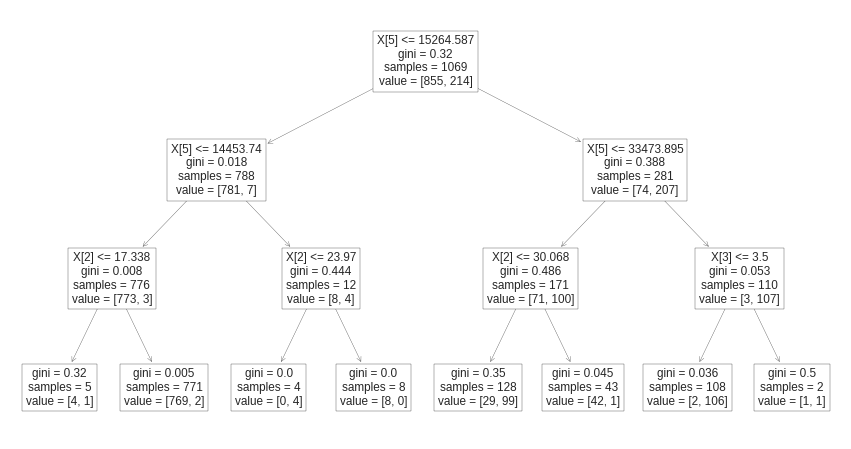

In [ ]:
plt.figure(figsize=(15,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, Y_train)) 

Visualizing decision-trees with graphviz

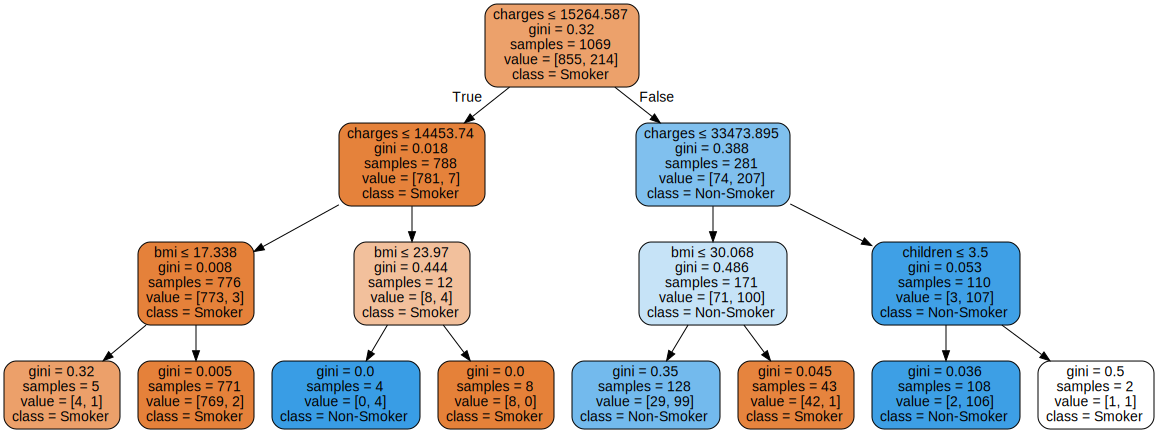

In [ ]:
import graphviz 
#Build the tree
target_names = ['Smoker', 'Non-Smoker']
dot_data = tree.export_graphviz(clf_gini, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=target_names,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

Decision Tree Classifier with criterion entropy

In [ ]:
# DecisionTreeClassifier model with criterion entropy

clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=100)#considering max_depth
clf_en_wd = DecisionTreeClassifier(criterion='entropy', random_state=100)


# fit the model
clf_en.fit(X_train, Y_train)
clf_en_wd.fit(X_train, Y_train)


DecisionTreeClassifier(criterion='entropy', random_state=100)

Predict the Test set results with criterion entropy

In [ ]:
#Predict the Test set results with criterion entropy
y_pred_test_entropy = clf_en.predict(X_test)
y_pred_test_entropy_wd = clf_en_wd.predict(X_test)
y_pred_test_entropy

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0])

Check accuracy score with criterion entropy

In [ ]:
#Check accuracy score with criterion entropy with considering max_depth
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(Y_test, y_pred_test_entropy)))

Model accuracy score with criterion entropy: 0.9701


In [ ]:
#Check accuracy score with criterion entropy
from sklearn.metrics import accuracy_score

print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(Y_test, y_pred_test_entropy_wd)))

Model accuracy score with criterion entropy: 0.9739


Compare the train-set and test-set accuracy

In [ ]:
#Compare the train-set and test-set accuracy
#Now, I will compare the train-set and test-set accuracy to check for overfitting.

y_pred_train_entropy = clf_en.predict(X_train)

y_pred_train_entropy

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(Y_train, y_pred_train_entropy)))

Training-set accuracy score: 0.9645


In [ ]:
#Check for overfitting and underfitting
# print the scores on training and test set

print('Training set score: {:.4f}'.format(clf_en.score(X_train, Y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, Y_test)))


Training set score: 0.9645
Test set score: 0.9701


Visualize decision-trees


[Text(0.4583333333333333, 0.875, 'X[5] <= 14453.74\nentropy = 0.722\nsamples = 1069\nvalue = [855, 214]'),
 Text(0.25, 0.625, 'X[2] <= 21.727\nentropy = 0.037\nsamples = 776\nvalue = [773, 3]'),
 Text(0.16666666666666666, 0.375, 'X[5] <= 12652.403\nentropy = 0.31\nsamples = 54\nvalue = [51, 3]'),
 Text(0.08333333333333333, 0.125, 'entropy = 0.0\nsamples = 48\nvalue = [48, 0]'),
 Text(0.25, 0.125, 'entropy = 1.0\nsamples = 6\nvalue = [3, 3]'),
 Text(0.3333333333333333, 0.375, 'entropy = 0.0\nsamples = 722\nvalue = [722, 0]'),
 Text(0.6666666666666666, 0.625, 'X[5] <= 33473.895\nentropy = 0.855\nsamples = 293\nvalue = [82, 211]'),
 Text(0.5, 0.375, 'X[2] <= 30.325\nentropy = 0.986\nsamples = 183\nvalue = [79, 104]'),
 Text(0.4166666666666667, 0.125, 'entropy = 0.787\nsamples = 136\nvalue = [32, 104]'),
 Text(0.5833333333333334, 0.125, 'entropy = 0.0\nsamples = 47\nvalue = [47, 0]'),
 Text(0.8333333333333334, 0.375, 'X[0] <= 54.5\nentropy = 0.181\nsamples = 110\nvalue = [3, 107]'),
 Text(

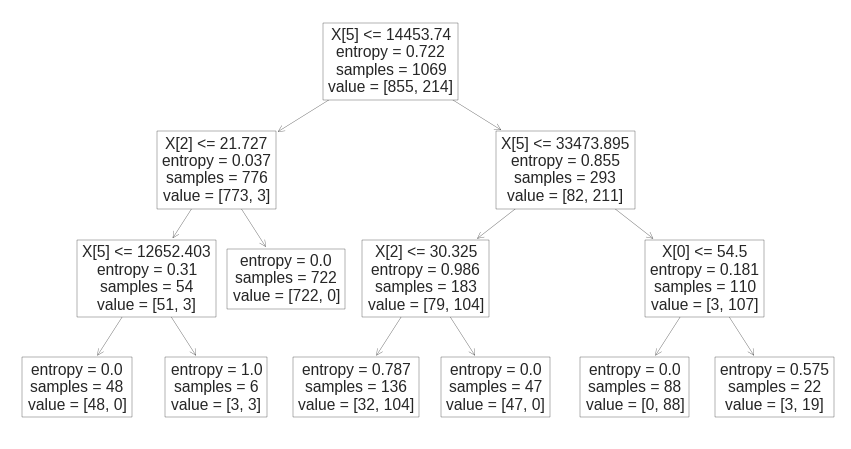

In [ ]:
#Visualize decision-trees
plt.figure(figsize=(15,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, Y_train)) 

Visualizing decision-trees with graphviz


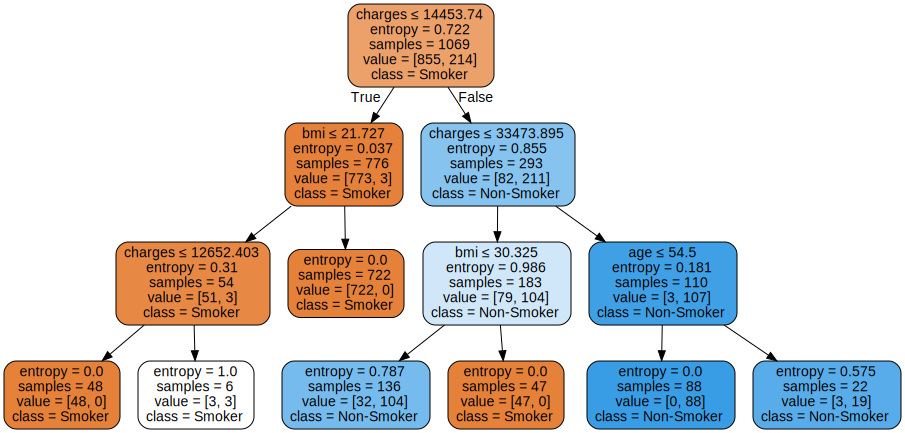

In [ ]:
#Visualize decision-trees with graphviz
import graphviz 
target_names = ['Smoker', 'Non-Smoker']
dot_data = tree.export_graphviz(clf_en, out_file=None, 
                              feature_names=X_train.columns,  
                              class_names=target_names,  
                              filled=True, rounded=True,  
                              special_characters=True)

graph = graphviz.Source(dot_data) 

graph 

Classification Report 

In [ ]:
from sklearn.metrics import classification_report

#Classification report is another way to evaluate the classification model performance. 
#It displays the precision, recall, f1 and support scores for the model

print(classification_report(Y_test, Y_pred_test_gini))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98       208
           1       0.91      0.98      0.94        60

    accuracy                           0.97       268
   macro avg       0.95      0.98      0.96       268
weighted avg       0.98      0.97      0.97       268



Confusion Matrix

In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

CMatrix = confusion_matrix(Y_test, Y_pred_test_gini)

print('Confusion matrix\n\n', CMatrix)

Confusion matrix

 [[202   6]
 [  1  59]]


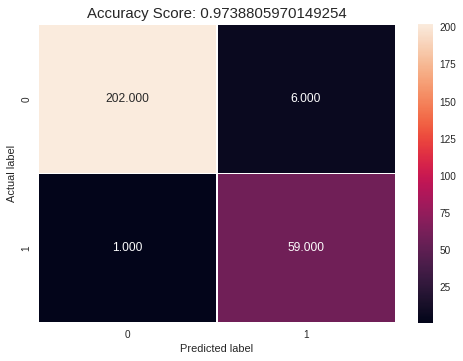

In [ ]:
sns.heatmap(CMatrix, annot=True, fmt=".3f", linewidths=.5)
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
CMatrix_title = 'Accuracy Score: {0}'.format(accuracy_score(Y_pred_test_gini, Y_test))
plt.title(CMatrix_title, fontsize = 15);


###3.2 Predicting wheather the person is smoker or not using Support Vector Regression (SVR)


In [ ]:
insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0.0,1,3,16884.92400
1,18,1,33.770,1.0,0,2,1725.55230
2,28,1,33.000,3.0,0,2,4449.46200
3,33,1,22.705,0.0,0,1,21984.47061
4,32,1,28.880,0.0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3.0,0,1,10600.54830
1334,18,0,31.920,0.0,0,0,2205.98080
1335,18,0,36.850,0.0,0,2,1629.83350
1336,21,0,25.800,0.0,0,3,2007.94500


In [ ]:
X = insurance_dataset.drop(columns='smoker', axis=1) #assigning all columns except smoker column to X variable as independand variable
Y = insurance_dataset['smoker'] # assigning smoker column to Y variable as dependable variable

In [ ]:
X

,age,sex,bmi,children,region,charges
0,19,0,27.900,0.0,3,16884.92400
1,18,1,33.770,1.0,2,1725.55230
2,28,1,33.000,3.0,2,4449.46200
3,33,1,22.705,0.0,1,21984.47061
4,32,1,28.880,0.0,1,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3.0,1,10600.54830
1334,18,0,31.920,0.0,0,2205.98080
1335,18,0,36.850,0.0,2,1629.83350
1336,21,0,25.800,0.0,3,2007.94500


In [ ]:
Y

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1337, dtype: int64

In [ ]:
#libraries for data splitting
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
 
#displaying no of rows and columns of X,X_train and X_test
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_train shpae: ", Y_train.shape)
print("Y_test shape: ", Y_test.shape)

X_train shape:  (1069, 6)
X_test shape:  (268, 6)
Y_train shpae:  (1069,)
Y_test shape:  (268,)


In [ ]:
#Import the model
from sklearn.svm import SVR #support vector regressor

#Model Training
svm = SVR()
svm.fit(X_train,Y_train)

SVR()

In [ ]:
#Prediction on Test Data


y_pred_svm = svm.predict(X_test)
y_pred_svm

SVR Model Evaluation

In [ ]:
df = pd.DataFrame({'Actual':Y_test, 'svr':y_pred_svm})
df

,Actual,svr
900,0,-0.096878
1064,0,-0.071792
1256,0,-0.018466
298,1,0.959969
237,0,-0.035074
...,...,...
534,0,0.127777
542,0,0.131936
760,0,-0.015858
1284,1,1.099079


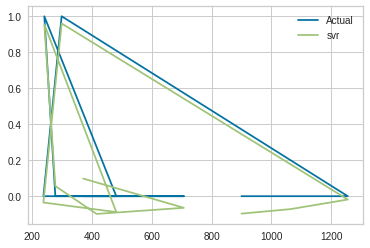

In [ ]:
import matplotlib.pyplot as plt #importing library for plotting graph

# Set the figure size to be twice as wide
plt.figure(figsize=(6, 4))
plt.plot(df['Actual'].iloc[0:11],label='Actual')
plt.plot(df['svr'].iloc[0:11],label="svr")
plt.legend()

In [ ]:
#calculating mean squared value for the predicted value
import numpy as np
np.mean((Y_test - y_pred_svm)**2)


0.046956919065668616

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

r2score = metrics.r2_score(Y_test,y_pred_svm)
mae = metrics.mean_absolute_error(Y_test,y_pred_svm)
mse = mean_squared_error(Y_test,y_pred_svm)
print("R squared vale : ",(r2score))
print("MAE value: ",(mae))
print("MSE value: ",(mse))

R squared vale :  0.7297569106592481
MAE value:  0.1208035344483311
MSE value:  0.046956919065668616


In [ ]:
# prediction on training data
print("prediction on training data\n")
training_data_prediction =svm.predict(X_train)
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)
#Mean Absolute Error (MAE)
mae_train = metrics.mean_absolute_error(Y_train,training_data_prediction)
print("MAE value: ",(mae_train))

#Mean Squared Error (MAE)
mse_train = mean_squared_error(Y_train,training_data_prediction)
print("MSE value: ",(mse_train))


# prediction on test data
print("\nprediction on test data\n")
test_data_prediction =svm.predict(X_test)
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)
#Mean Absolute Error (MAE)
mae_test = metrics.mean_absolute_error(Y_test,test_data_prediction)
print("MAE value: ",(mae_test))
#Mean Squared Error (MAE)
mse_test = mean_squared_error(Y_test,test_data_prediction)
print("MSE value: ",(mse_test))

prediction on training data

R squared vale :  0.6025023793151549
MAE value:  0.14168839139625258
MSE value:  0.06364422627015281

prediction on test data

R squared vale :  0.7297569106592481
MAE value:  0.1208035344483311
MSE value:  0.046956919065668616


In [ ]:
# calculating accuracy rate for svr model
ac_training=round(r2_train,1)*100
ac_testing=round(r2_test,1)*100
# Create a dictionary with the scores
scores = {'R2 Score': [r2_train, r2_test], 'MAE': [mae_train, mae_test], 'MSE': [mse_train, mse_test], 'ACCURACY': [ac_training, ac_testing]}

# Create a DataFrame from the dictionary
scores_df = pd.DataFrame(scores, index=['Training', 'Testing'])

# Display the DataFrame
scores_df


,R2 Score,MAE,MSE,ACCURACY
Training,0.602502,0.141688,0.063644,60.0
Testing,0.729757,0.120804,0.046957,70.0


###3.2 Predicting wheather the person is smoker or not using Logistic Regression

In [ ]:
insurance_dataset

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0.0,1,3,16884.92400
1,18,1,33.770,1.0,0,2,1725.55230
2,28,1,33.000,3.0,0,2,4449.46200
3,33,1,22.705,0.0,0,1,21984.47061
4,32,1,28.880,0.0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3.0,0,1,10600.54830
1334,18,0,31.920,0.0,0,0,2205.98080
1335,18,0,36.850,0.0,0,2,1629.83350
1336,21,0,25.800,0.0,0,3,2007.94500


In [ ]:
X = insurance_dataset.drop(columns='smoker', axis=1) #assigning all columns except smoker column to X variable as independand variable
Y = insurance_dataset['smoker'] # assigning smoker column to Y variable as dependable variable

In [ ]:
X

,age,sex,bmi,children,region,charges
0,19,0,27.900,0.0,3,16884.92400
1,18,1,33.770,1.0,2,1725.55230
2,28,1,33.000,3.0,2,4449.46200
3,33,1,22.705,0.0,1,21984.47061
4,32,1,28.880,0.0,1,3866.85520
...,...,...,...,...,...,...
1333,50,1,30.970,3.0,1,10600.54830
1334,18,0,31.920,0.0,0,2205.98080
1335,18,0,36.850,0.0,2,1629.83350
1336,21,0,25.800,0.0,3,2007.94500


In [ ]:
Y

0       1
1       0
2       0
3       0
4       0
       ..
1333    0
1334    0
1335    0
1336    0
1337    1
Name: smoker, Length: 1337, dtype: int64

In [ ]:
#libraries for data splitting
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
 
#displaying no of rows and columns of X,X_train and X_test
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)
print("Y_train shpae: ", Y_train.shape)
print("Y_test shape: ", Y_test.shape)

X_train shape:  (1069, 6)
X_test shape:  (268, 6)
Y_train shpae:  (1069,)
Y_test shape:  (268,)


In [ ]:
#import Logistic  Regression
from sklearn.linear_model import LogisticRegression
#Fit  Logistic Regression 
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)

LogisticRegression()

In [ ]:
#Prediction on Test Data

Y_predict_test=log_reg.predict(X_test)
Y_predict_test

array([0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0])

Model Evaluation

In [ ]:

df = pd.DataFrame({'Actual':Y_test, 'lr':Y_predict_test})
df

,Actual,lr
900,0,0
1064,0,0
1256,0,0
298,1,1
237,0,0
...,...,...
534,0,0
542,0,0
760,0,0
1284,1,1


In [ ]:
LogisticRegression

sklearn.linear_model._logistic.LogisticRegression

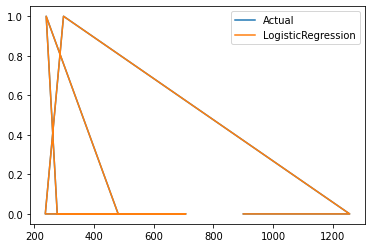

In [ ]:
import matplotlib.pyplot as plt #importing library for plotting graph

# Set the figure size to be twice as wide
plt.figure(figsize=(6, 4))
plt.plot(df['Actual'].iloc[0:11],label='Actual')
plt.plot(df['lr'].iloc[0:11],label="LogisticRegression")
plt.legend()

In [ ]:
#calculating mean squared value for the predicted value
import numpy as np
np.mean((Y_test - Y_predict_test)**2)

0.05223880597014925

In [ ]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error

r2score = metrics.r2_score(Y_test,Y_predict_test)
mae = metrics.mean_absolute_error(Y_test,Y_predict_test)
mse = mean_squared_error(Y_test,Y_predict_test)
print("R squared vale : ",(r2score))
print("MAE value: ",(mae))
print("MSE value: ",(mse))

R squared vale :  0.6993589743589743
MAE value:  0.05223880597014925
MSE value:  0.05223880597014925


In [ ]:
# prediction on training data
print("prediction on training data\n")
training_data_prediction =log_reg.predict(X_train)
# R squared value
r2_train = metrics.r2_score(Y_train, training_data_prediction)
print('R squared vale : ', r2_train)
#Mean Absolute Error (MAE)
mae_train = metrics.mean_absolute_error(Y_train,training_data_prediction)
print("MAE value: ",(mae_train))

#Mean Squared Error (MAE)
mse_train = mean_squared_error(Y_train,training_data_prediction)
print("MSE value: ",(mse_train))


# prediction on test data
print("\nprediction on test data\n")
test_data_prediction =log_reg.predict(X_test)
# R squared value
r2_test = metrics.r2_score(Y_test, test_data_prediction)
print('R squared vale : ', r2_test)
#Mean Absolute Error (MAE)
mae_test = metrics.mean_absolute_error(Y_test,test_data_prediction)
print("MAE value: ",(mae_test))
#Mean Squared Error (MAE)
mse_test = mean_squared_error(Y_test,test_data_prediction)
print("MSE value: ",(mse_test))

prediction on training data

R squared vale :  0.5326009728370772
MAE value:  0.07483629560336763
MSE value:  0.07483629560336763

prediction on test data

R squared vale :  0.6993589743589743
MAE value:  0.05223880597014925
MSE value:  0.05223880597014925


In [ ]:
# calculating accuracy rate for logistic regression model
ac_training=round(r2_train,1)*100
ac_testing=round(r2_test,1)*100
# Create a dictionary with the scores
scores = {'R2 Score': [r2_train, r2_test], 'MAE': [mae_train, mae_test], 'MSE': [mse_train, mse_test], 'ACCURACY': [ac_training, ac_testing]}

# Create a DataFrame from the dictionary
scores_df = pd.DataFrame(scores, index=['Training', 'Testing'])

# Display the DataFrame
scores_df

,R2 Score,MAE,MSE,ACCURACY
Training,0.532601,0.074836,0.074836,50.0
Testing,0.699359,0.052239,0.052239,70.0


In [ ]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

CMatrix = confusion_matrix(Y_test, Y_predict_test)

print('Confusion matrix\n\n', CMatrix)

Confusion matrix

 [[202   6]
 [  8  52]]


In [ ]:
from sklearn.metrics import classification_report

#Classification report is another way to evaluate the classification model performance. 
#It displays the precision, recall, f1 and support scores for the model

print(classification_report(Y_test, Y_predict_test))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       208
           1       0.90      0.87      0.88        60

    accuracy                           0.95       268
   macro avg       0.93      0.92      0.92       268
weighted avg       0.95      0.95      0.95       268



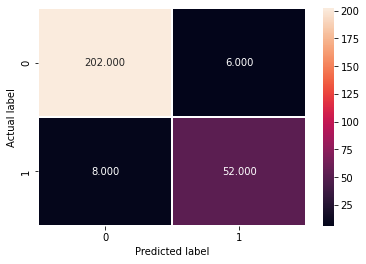

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.heatmap(CMatrix, annot=True, fmt=".3f", linewidths=.5)
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
#CMatrix_title = 'Accuracy Score: {0}'.format(accuracy_score(Y_test,Y_predict_test))
#plt.title(CMatrix_title, fontsize = 15);

In [ ]:
lr = LinearRegression()
lr.fit(X_train,Y_train)
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)
gr = GradientBoostingRegressor()
gr.fit(X_train,Y_train)

y_pred1 = lr.predict(X_test)
y_pred2 = rf.predict(X_test)
y_pred3 = gr.predict(X_test)

df = pd.DataFrame({'Actual':Y_test,'LinearRegression':y_pred1,'RandomForestRegressor':y_pred2,'GradientBoostingRegressor':y_pred3})

df

In [ ]:
from sklearn import metrics

r2_score1 = metrics.r2_score(Y_test,Y_pred_test_gini) #decisionTree
r2_score2 = metrics.r2_score(Y_test,y_pred_svm) #SVR model
r2_score3 = metrics.r2_score(Y_test,Y_predict_test)#logistic regression

mae1 = metrics.mean_absolute_error(Y_test,Y_pred_test_gini)
mae2 = metrics.mean_absolute_error(Y_test,y_pred_svm)
mae3 = metrics.mean_absolute_error(Y_test,Y_predict_test)

ac1=round(r2_score1,1)*100
ac2=round(r2_score2,1)*100
ac3=round(r2_score3,1)*100

# Create a dictionary with the scores
scores = {'R2 Score': [r2_score1, r2_score2, r2_score3], 'MAE': [mae1, mae2, mae3], 'ACCURACY': [ac1, ac2, ac3]}

# Create a DataFrame from the dictionary
scores_df = pd.DataFrame(scores, index=['DecisionTreeClassification', 'SupportVectorRegression', 'LogisticRegression'])

# Display the DataFrame
scores_df

,R2 Score,MAE,ACCURACY
DecisionTreeClassification,0.849679,0.026119,80.0
SupportVectorRegression,0.729757,0.120804,70.0
LogisticRegression,0.699359,0.052239,70.0
